In [1]:
# TODO: include values only in noon report data
# TODO: inspect that datetime conversion happened correctly (one of each data point, maybe additional checks)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [25]:
notebook_dir = os.getcwd()
data_dir = os.path.dirname(os.path.dirname(notebook_dir))
appended_dir = os.path.join(data_dir, 'appended')
data_path = os.path.join(appended_dir, 'excl_noon_reports.csv')

df = pd.read_csv(data_path, parse_dates=['utc_timestamp'])

df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], format='ISO8601')

In [27]:
df.shape

(41079968, 6)

In [28]:
df.head()

,utc_timestamp,qid_mapping,value,quantity_name,source_name,unit
0,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::3::0_8,-0.4000,Vessel External Conditions Eastward Sea Water ...,Provider S,m/s
1,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_56::0::4::0_8,0.0000,Vessel External Conditions Northward Sea Water...,Provider MB,m/s
2,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_45::0::1::0_8,2.7000,Vessel External Conditions Wave Significant He...,Provider MB,m
3,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::5::0_8,0.5391,Vessel External Conditions Eastward Wind Velocity,Provider S,m/s
4,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_2::0::15::21_8,79.0000,Vessel External Conditions Wind True Angle,Provider MB,degrees


In [29]:
df.tail()

,utc_timestamp,qid_mapping,value,quantity_name,source_name,unit
41079963,2024-12-31 23:59:45.021000+00:00,3::0::1::0_1::2::0::8::0_1::0::6::0_8,0.0,Main Engine Rotational Speed,Control Alarm Monitoring System,rpm
41079964,2024-12-31 23:59:45.021000+00:00,3::0::1::0_1::1::0::2::0_11::0::3::0_8,0.0,Vessel Hull MidP Draft,Control Alarm Monitoring System,m
41079965,2024-12-31 23:59:45.021000+00:00,3::0::1::0_1::1::0::2::0_11::0::1::0_8,0.0,Vessel Hull Fore Draft,Control Alarm Monitoring System,m
41079966,2024-12-31 23:59:45.021000+00:00,3::0::1::0_1::1::0::2::0_11::0::4::0_8,0.0,Vessel Hull MidS Draft,Control Alarm Monitoring System,m
41079967,2024-12-31 23:59:45.021000+00:00,3::0::1::0_1::1::0::2::0_11::0::2::0_8,0.0,Vessel Hull Aft Draft,Control Alarm Monitoring System,m


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41079968 entries, 0 to 41079967
Data columns (total 6 columns):
 #   Column         Dtype              
---  ------         -----              
 0   utc_timestamp  datetime64[ns, UTC]
 1   qid_mapping    object             
 2   value          float64            
 3   quantity_name  object             
 4   source_name    object             
 5   unit           object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 1.8+ GB


In [31]:
df.describe()

,value
count,4.107997e+07
mean,2.795997e+08
std,1.250238e+09
min,-2.475704e+04
25%,0.000000e+00
50%,1.210000e+01
75%,3.040000e+02
max,6.776511e+09


In [ ]:
# check distribution of variables

In [35]:
def check_monthly_distribution(df, month):
    month_data = df[df['utc_timestamp'].dt.month == month]
    counts = month_data['utc_timestamp'].dt.day.value_counts().sort_index()
    total_data_points = len(month_data)
    
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Distribution of Data Points in {datetime(2023, month, 1).strftime("%B")} (Total: {total_data_points})')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Data Points')
    plt.show()

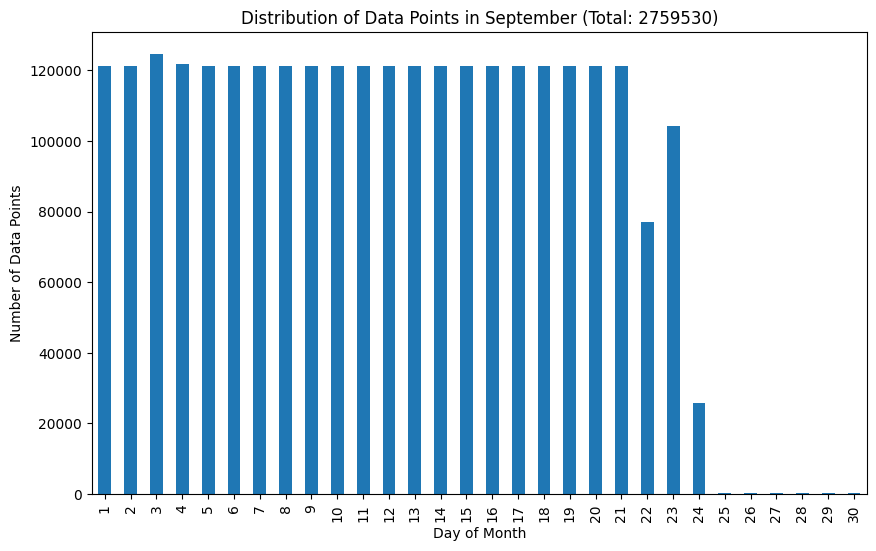

In [36]:
check_monthly_distribution(df, 9)